<a href="https://colab.research.google.com/github/ZohanaZuthi/Machine_Learning_Algorithm_Udemy/blob/main/K_Mean_Clustering_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Impoting Libraries**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Importing the dataset**

In [10]:
dataset=pd.read_csv('Mall_Customers.csv')
# in clustering we will take every feature for identifying any patterns
x=dataset.iloc[:,[3,4]].values
y=dataset.iloc[:,-1].values

## **Using the elbow method to find the optimal number of clusters**

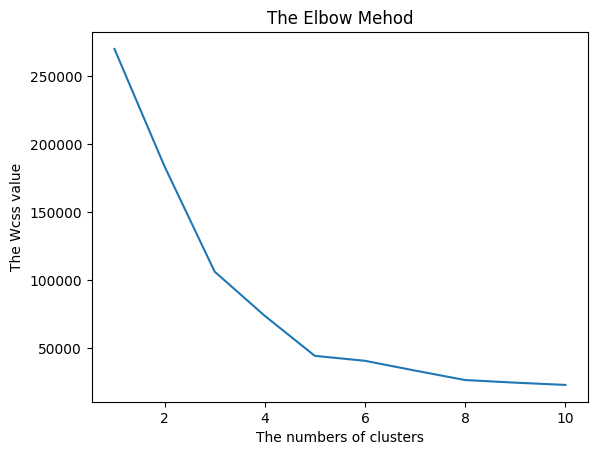

In [11]:
from sklearn.cluster import KMeans
WCSS=[]
# python range includes lower bound but excludes upper bound
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  # kmeansinertia will give the wcss value inbuilt method
  WCSS.append(kmeans.inertia_)
# we will plot graph where the clusters number will be on x axis and in y axis there will be Wcss values
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Mehod')
plt.xlabel('The numbers of clusters')
plt.ylabel('The Wcss value')
plt.show()

## **Training the K-Mean model on the dataset**

In [15]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
# fit_predict returns a 1D NumPy array of shape
y_means=kmeans.fit_predict(x)

In [16]:
print(y_means)
#  here each value shows the assignes cluster

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Fit: The fit part of the method means it computes the clustering by:

Finding cluster centers (centroids).
Iteratively optimizing the assignment of data points to clusters based on their distances to the centroids.
Predict: The predict part means it assigns each data point in X to one of the computed clusters. The result is a 1D array of cluster labels where each label indicates the cluster number for the corresponding data point in X.

## **Visualizing the Clusters**

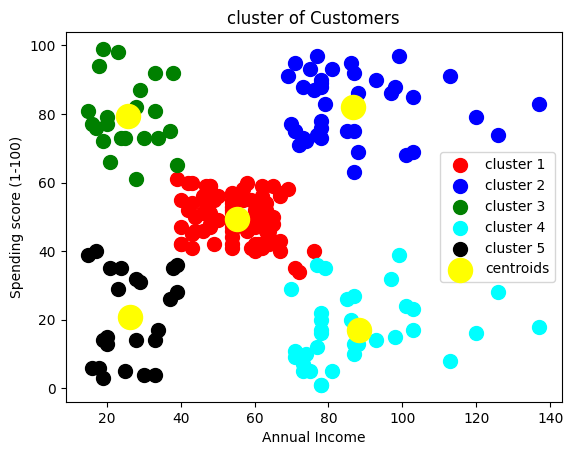

In [21]:
# here  y_kmeans==0 means we just want to take the cluster number 0
# and other 0 means we will take all the values of first column which is annual income
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='red',label='cluster 1')
# s is the size of the points for ddisplay
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='green',label='cluster 3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='cyan',label='cluster 4')
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=100,c='black',label='cluster 5')
# 0 crrespondace to x axis
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title('cluster of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()